In [162]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Loading data

In [118]:
ETF_names = ['EEM', 'EFA', 'EMB', 'EWA', 'EWG', 'EWH', 'IEF', 'TLT', 'TIP']
ETF = {}
for i in ETF_names:
    ETF[i] = web.DataReader(i,
                            'yahoo',
                           datetime.datetime(2001, 1, 1))

In [119]:
index_keys = {'SP_500': '^GSPC', 'VIX': '^VIX', 'UST 2': 'DGS2', 'UST 5': 'DGS5', 'UST 10': 'DGS10'}
index_resourse = {'SP_500': 'yahoo', 'VIX': 'yahoo', 'UST 2': 'fred', 'UST 5': 'fred', 'UST 10': 'fred'}
index_names = ['SP_500', 'VIX', 'UST 2', 'UST 10', 'UST 5']
indexes = {}
for i in index_names:
    indexes[i] = web.DataReader(index_keys[i],
                               index_resourse[i],
                               datetime.datetime(2001, 1, 1))

In [120]:
for i in  ETF:
    ETF[i]['Pct'] = ETF[i]['Adj Close'].pct_change() * 100.0
for i in ['SP_500', 'VIX']:
    indexes[i]['Pct'] = indexes[i]['Adj Close'].pct_change() * 100.0
for i in ['UST 2', 'UST 10', 'UST 5']:
    indexes[i]['Pct'] = indexes[i][index_keys[i]]

# Rolling Correlation

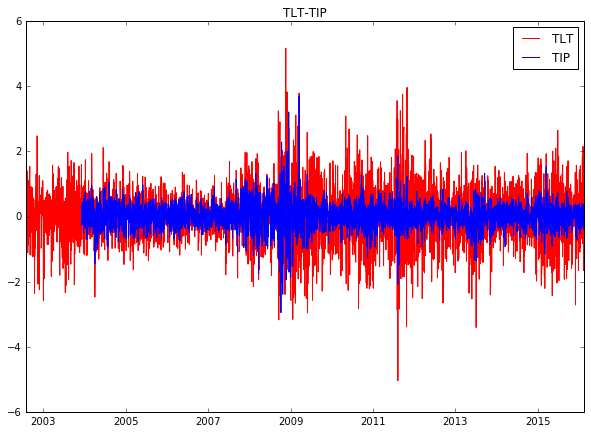

In [183]:
#TLT-TIP
plt.figure(figsize=(10,7))
plt.title('TLT-TIP')
plt.plot(ETF['TLT']['Pct'], c='red', label='TLT')
plt.plot(ETF['TIP']['Pct'], c='blue', label='TIP')
plt.legend(loc='best')

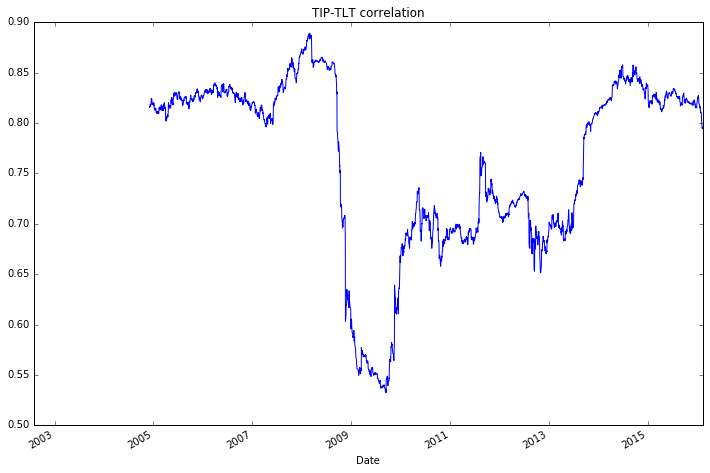

In [180]:
plt.figure(figsize=(12,8))
plt.title('TIP-TLT correlation')
pd.rolling_corr(ETF['TLT']['Pct'], ETF['TIP']['Pct'], window=250).plot()

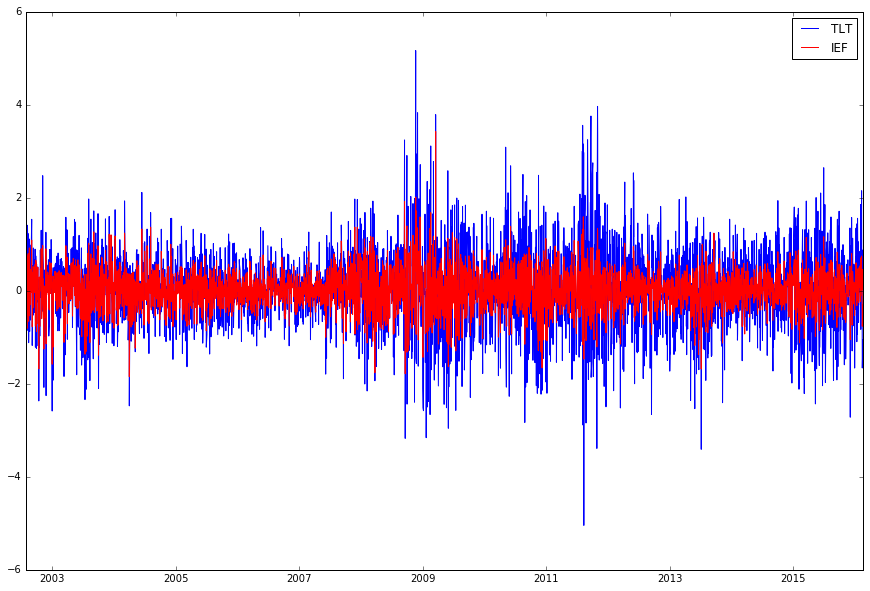

In [123]:
#IEF-TLT
plt.figure(figsize=(15,10))
plt.plot(ETF['TLT']['Pct'], c='blue', label='TLT')
plt.plot(ETF['IEF']['Pct'], c='red', label='IEF')
plt.legend(loc='best')

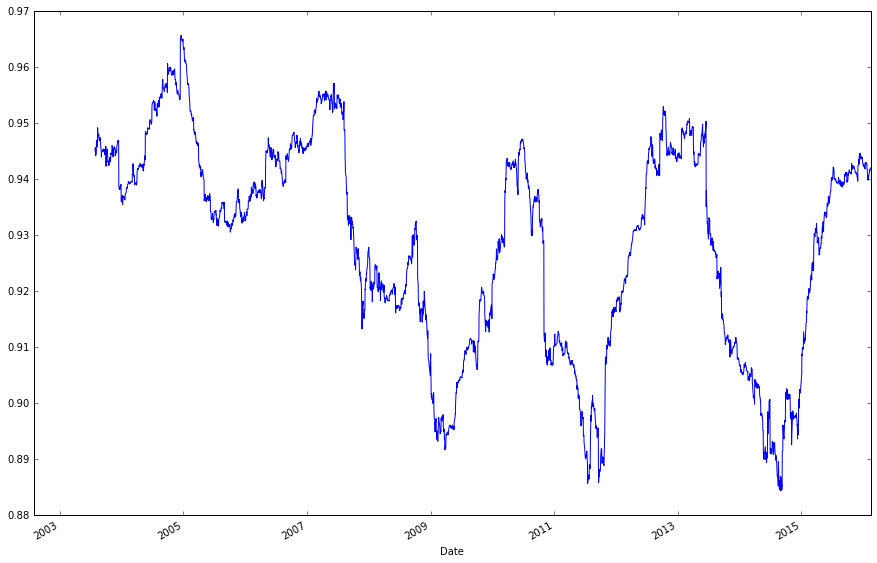

In [124]:
plt.figure(figsize=(15,10))
pd.rolling_corr(ETF['IEF']['Pct'], ETF['TLT']['Pct'], window=250).plot()

In [125]:
all_indexes = pd.DataFrame()
for i in index_names:
    all_indexes[i] = indexes[i]['Pct']
all_ETFs = pd.DataFrame()
for i in ETF_names:
    all_ETFs[i] = ETF[i]['Pct']

# Betas

In [126]:
from sklearn import linear_model
Betas = pd.DataFrame(columns=[index_names], index = ETF_names)
for i in ETF_names:
    result = pd.concat([all_indexes, all_ETFs[[i]]], axis=1, join='inner').dropna(axis=0)
    clf = linear_model.LinearRegression()
    clf.fit(result.drop([i], axis=1), result[[i]])
    Betas.loc[i] = clf.coef_
Betas

,SP_500,VIX,UST 2,UST 10,UST 5
EEM,1.36823,-0.00541329,0.0426367,0.0639497,-0.0601301
EFA,1.02974,-0.00938121,0.0150808,0.026969,-0.0215743
EMB,0.0450989,-0.0184478,-0.00791581,0.0279001,-0.037809
EWA,1.12015,-0.0141006,0.0142638,0.0152182,-6.88498e-05
EWG,1.15756,-0.00555594,0.0512847,0.0781343,-0.0949552
EWH,1.06394,-9.07253e-05,0.0427529,0.0662334,-0.0809663
IEF,-0.124503,0.00416678,0.0465475,0.0433925,-0.0951742
TLT,-0.270768,0.00782136,0.0311565,-0.0370133,-0.0231463
TIP,-0.059516,0.00274268,0.0416605,0.053548,-0.0928481


# Correlation Matrix

In [127]:
all_data = pd.DataFrame()
for i in ETF_names:
    all_data.insert(0, i, ETF[i]['Pct'])
all_data = all_data.dropna(axis=0)
for i in index_names:
    all_data.insert(0, i, indexes[i]['Pct'])
all_data = all_data.dropna(axis=0)

In [128]:
all_data.corr()

,UST 5,UST 10,UST 2,VIX,SP_500,TIP,TLT,IEF,EWH,EWG,EWA,EMB,EFA,EEM
UST 5,1.000000,0.934832,0.877832,0.000202,-0.017349,-0.023436,-0.029792,-0.031384,-0.022117,-0.016768,-0.006292,-0.017260,-0.016314,-0.004469
UST 10,0.934832,1.000000,0.732875,-0.004877,-0.007890,-0.016608,-0.035814,-0.030180,-0.011866,-0.006025,0.001019,-0.010575,-0.006412,0.004269
UST 2,0.877832,0.732875,1.000000,0.006501,-0.032522,-0.017667,-0.016442,-0.015327,-0.033705,-0.029104,-0.018756,-0.021565,-0.029934,-0.017499
VIX,0.000202,-0.004877,0.006501,1.000000,-0.751538,0.192717,0.403425,0.388271,-0.583902,-0.651899,-0.647241,-0.249615,-0.706753,-0.646132
SP_500,-0.017349,-0.007890,-0.032522,-0.751538,1.000000,-0.224842,-0.465771,-0.448551,0.805194,0.857690,0.828296,0.224277,0.916383,0.884300
TIP,-0.023436,-0.016608,-0.017667,0.192717,-0.224842,1.000000,0.672318,0.741307,-0.185651,-0.170452,-0.098799,0.179264,-0.157917,-0.167809
TLT,-0.029792,-0.035814,-0.016442,0.403425,-0.465771,0.672318,1.000000,0.911245,-0.372237,-0.443067,-0.381073,-0.039640,-0.437021,-0.409025
IEF,-0.031384,-0.030180,-0.015327,0.388271,-0.448551,0.741307,0.911245,1.000000,-0.371797,-0.403257,-0.352894,0.008398,-0.402699,-0.398573
EWH,-0.022117,-0.011866,-0.033705,-0.583902,0.805194,-0.185651,-0.372237,-0.371797,1.000000,0.722070,0.768298,0.166050,0.807734,0.877449
EWG,-0.016768,-0.006025,-0.029104,-0.651899,0.857690,-0.170452,-0.443067,-0.403257,0.722070,1.000000,0.806494,0.227506,0.941896,0.836416


# Profitability

#arithmetic 

In [139]:
all_data_loc = all_data[(all_data.index > datetime.datetime(2006, 1, 1)) & (all_data.index < datetime.datetime(2016, 1, 1))]

In [169]:
arithmetic_profit_daily = {}
annual_arithmetic_profit = {}
annual_sigma = {}
daily_sigma = {}
ds = {}
for i in all_data.columns:
    r = all_data_loc[i]
    r_av = np.average(r)
    arithmetic_profit_daily[i] = r_av
    annual_arithmetic_profit[i] = r_av * 250.0
    daily_sigma[i] = pd.rolling_std(r, window = len(r))[-1]
    annual_sigma[i] = daily_sigma[i] * np.sqrt(250.0)

In [188]:
loc_table = pd.DataFrame(columns=['daily_average_profit', 'annual_average_profit'])
for i in all_data.columns:
    loc_table.loc[i] = [arithmetic_profit_daily[i], annual_arithmetic_profit[i]]
loc_table

,daily_average_profit,annual_average_profit
UST 5,1.702273,425.568295
UST 10,2.725643,681.410768
UST 2,0.741311,185.327767
VIX,0.280725,70.181202
SP_500,0.020081,5.020303
TIP,0.014372,3.592910
TLT,0.032264,8.065929
IEF,0.021736,5.433985
EWH,0.017047,4.261660
EWG,0.004353,1.088225


In [186]:
loc_table = pd.DataFrame(columns=['daily_std', 'annual_std'])
for i in all_data.columns:
    loc_table.loc[i] = [daily_sigma[i], annual_sigma[i]]
loc_table

,daily_std,annual_std
UST 5,0.697838,11.033781
UST 10,0.712985,11.273284
UST 2,0.600396,9.493090
VIX,7.539713,119.213333
SP_500,1.376006,21.756561
TIP,0.442036,6.989196
TLT,1.008265,15.942069
IEF,0.472673,7.473613
EWH,1.760078,27.829280
EWG,1.909249,30.187871
